# Introduction to Bayesian inference and PyMC3

## Fraternali Group Retreat

__Author:__ Marius Kausas

__Date:__ 2018 09 02

# Initialize libraries

In [1]:
%matplotlib inline

import numpy as np
import pymc3 as pm
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('bmh')

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


# Useful reading

- Frequentist vs Bayesian inference

https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading20.pdf
    
http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/

- Jupyter notebooks featuring PyMC3

http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/

https://github.com/markdregan/Bayesian-Modelling-in-Python

https://github.com/fonnesbeck/Bios8366

- More about PyMC3

https://peerj.com/articles/cs-55/

https://docs.pymc.io/

https://docs.pymc.io/examples.html

https://discourse.pymc.io/

- Blogs

https://twiecki.github.io/

- When everything fails

https://arxiv.org/pdf/1601.00670.pdf

# Beta distribution examples

In [2]:
# Generate x-coord of 100 numbers in range of [0,1]

x = np.linspace(0, 1, 100)

# Setup alpha and beta parameters of Beta distribution

a = [0.1, 1, 2, 10]
b = [0.1, 1, 8, 10]

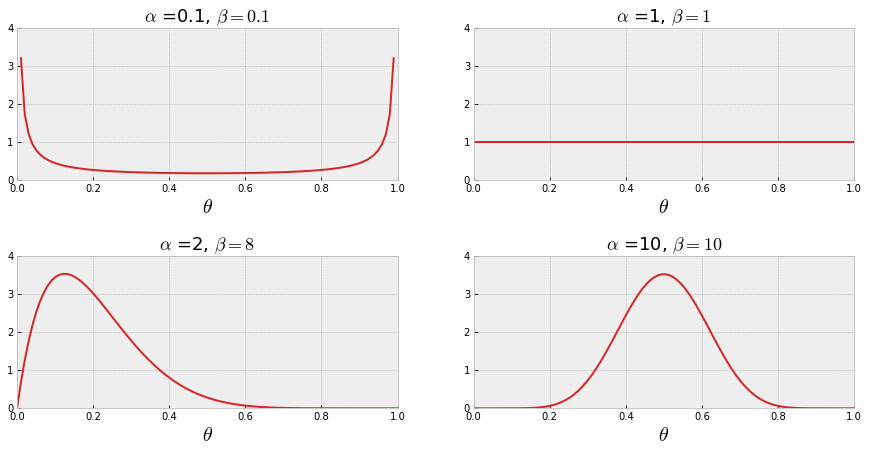

In [3]:
# Plot Beta distributions

fig = plt.figure(figsize=(15,7))

for i in range(len(a)):
    plt.subplot(2, 2, i+1)
    plt.plot(x, stats.beta.pdf(x, a[i], b[i]), c="tab:red")
    plt.xlim(0,1)
    plt.ylim(0,4)
    plt.title("$\\alpha$ ={}, $\\beta={}$".format(a[i], b[i]), fontsize=18)
    plt.xlabel("$\\theta$", fontsize=20)
    
# plt.suptitle("Probability density functions of Beta distribution", fontsize=20)
plt.subplots_adjust(hspace=0.5)
plt.savefig("beta_pdfs.png", dpi=600)

# Infering a Binomial distribution via analytical solution

# Set your flips

In [4]:
# Reproducible research

np.random.seed(123)

# Theoretical coin flipping

total_trials = 10

theta = 0.4

Y = np.random.binomial(1, theta, total_trials)

In [5]:
# 10 Coin flips (4 heads, 6 tails)

Y

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [6]:
# Define range of values [0,1] - need for PDFs calculation and plotting

x = np.linspace(0, 1, 100)

## Method I: Calculating posterior Beta distribution via updating Scipy Beta distribution function

In [7]:
# Setup prior Beta distribution parameters

a0=1
b0=1

# Update Beta distribution parameters

a1 = a0 + Y.sum()
b1 = b0 + total_trials - Y.sum()

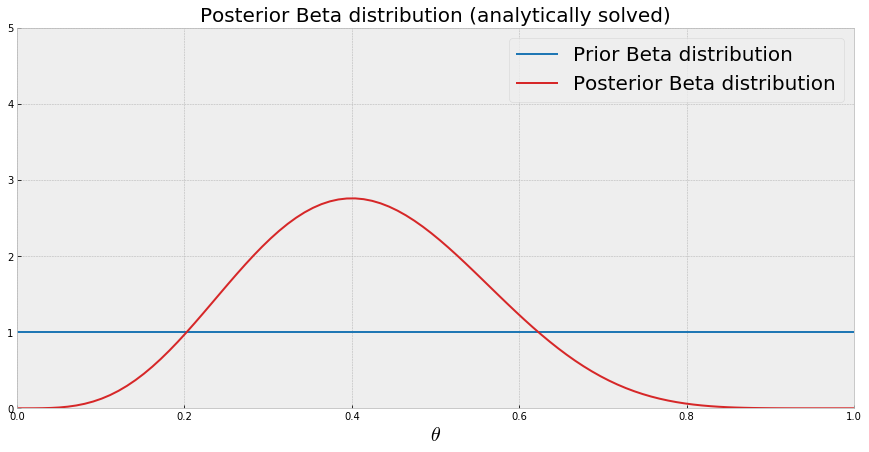

In [8]:
# Plot prior Beta distribution and analytically solved Beta distribution

fig = plt.figure(figsize=(15,7))

plt.plot(x, stats.beta.pdf(x, a0, b0), label="Prior Beta distribution", c="tab:blue")
plt.plot(x, stats.beta.pdf(x, a1, b1), label="Posterior Beta distribution", c="tab:red")
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.xlabel("$\\theta$", fontsize=20)
plt.title("Posterior Beta distribution (analytically solved)", fontsize=20)
plt.legend(fontsize=20)

## Method II: Calculating posterior Beta distribution via calculating Bernoulli likelihood

### Posterior update via a single coin flip

In [9]:
# Define the prior

prior_a = stats.beta.pdf(x, 2, 2)

# Calculate the Bernouli likelihood

likelihood_a = stats.bernoulli.pmf(1, x)

# Calculate Beta distribution denominator via integration

def f(x):
    return stats.beta.pdf(x, 2, 2) * stats.bernoulli.pmf(1, x)

beta_denom_a = scipy.integrate.quad(f, 0, 1)[0]

# Calculate the posterior

posterior_a = likelihood_a * prior_a / beta_denom_a

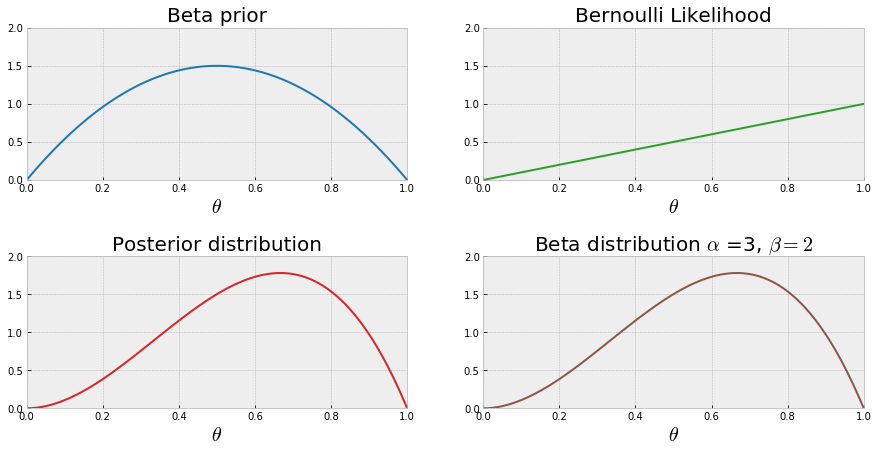

In [10]:
# Plot results (I)

fig = plt.figure(figsize=(15,7))

plt.subplot(2, 2, 1)
plt.plot(x, prior_a, 'tab:blue')
plt.xlabel("$\\theta$", fontsize=20)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.title("Beta prior", fontsize=20)

plt.subplot(2, 2, 2)
plt.plot(x, likelihood_a, 'tab:green')
plt.xlabel("$\\theta$", fontsize=20)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.title("Bernoulli Likelihood", fontsize=20)

plt.subplot(2, 2, 3)
plt.plot(x, posterior_a, 'tab:red')
plt.xlabel("$\\theta$", fontsize=20)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.title("Posterior distribution", fontsize=20)

plt.subplot(2, 2, 4)
plt.plot(x, stats.beta.pdf(x, 3, 2), 'tab:brown')
plt.xlabel("$\\theta$", fontsize=20)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.title("Beta distribution $\\alpha$ ={}, $\\beta={}$".format(3, 2), fontsize=20)

plt.subplots_adjust(hspace=0.5)

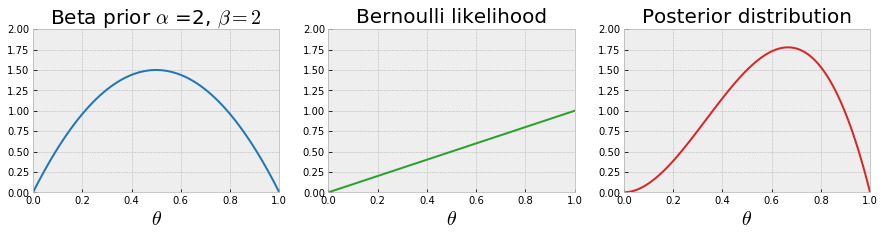

In [11]:
# Plot results (II)

fig = plt.figure(figsize=(15,3))

plt.subplot(1, 3, 1)
plt.plot(x, prior_a, 'tab:blue')
plt.xlabel("$\\theta$", fontsize=20)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.title("Beta prior $\\alpha$ ={}, $\\beta={}$".format(2, 2), fontsize=20)

plt.subplot(1, 3, 2)
plt.plot(x, likelihood_a, 'tab:green')
plt.xlabel("$\\theta$", fontsize=20)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.title("Bernoulli likelihood", fontsize=20)

plt.subplot(1, 3, 3)
plt.plot(x, posterior_a, 'tab:red')
plt.xlabel("$\\theta$", fontsize=20)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.title("Posterior distribution", fontsize=20)

plt.savefig("posterior_analytical.png", dpi=600, bbox_inches="tight")

### Finding the posterior via calculating a Bernoulli likelihood for a set of flips

In [12]:
# Remember the previous set of flips
# 10 Coin flips (4 heads, 6 tails)

Y

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [13]:
# Calculate Bernoulli likelihood for a given set of flips Y

yfliplikeli = 1

for i in range(len(Y)):
    yfliplikeli *= stats.bernoulli.pmf(Y[i], x)

In [14]:
# Define the prior

prior_b = stats.beta.pdf(x, 1, 1)

# Calculate the Bernouli likelihood

likelihood_b = stats.bernoulli.pmf(1, x)

# Calculate Beta distribution denominator via integration

def f(x):
    
    # Include calculation of likelihood for a set of flips into the function for later inegration.
    # So that scipy.integrate.quad function would get you the correct integral.
    
    yfliplikeli = 1
    
    Y = [1, 0, 0, 0, 1, 0, 1, 1, 0, 0]

    for i in range(len(Y)):
        yfliplikeli *= stats.bernoulli.pmf(Y[i], x)
    
    return stats.beta.pdf(x, 1, 1) * yfliplikeli

beta_denom_b = scipy.integrate.quad(f, 0, 1)[0]

# Calculate the posterior

posterior_b = prior_b * yfliplikeli / beta_denom_b

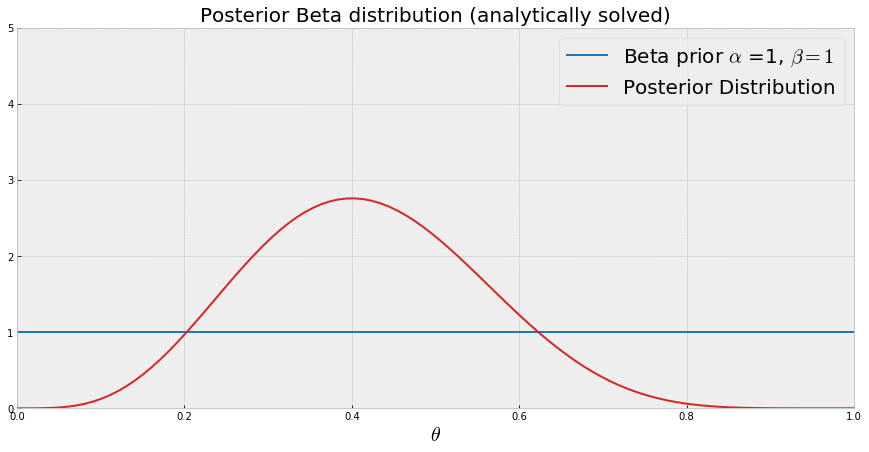

In [15]:
# Plot the findings

fig = plt.figure(figsize=(15,7))

plt.plot(x, prior_b, c="tab:blue", label="Beta prior $\\alpha$ ={}, $\\beta={}$".format(1, 1))
plt.plot(x, posterior_b, c="tab:red", label="Posterior Distribution")
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.xlabel("$\\theta$", fontsize=20)
plt.title("Posterior Beta distribution (analytically solved)", fontsize=20)
plt.legend(fontsize=20)

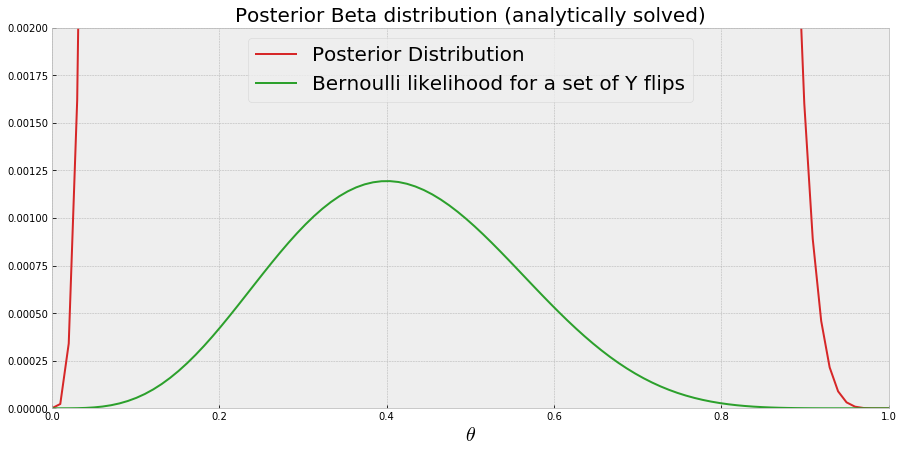

In [16]:
# Zoom in onto the likelihood

fig = plt.figure(figsize=(15,7))

plt.plot(x, prior_b, c="tab:blue")
plt.plot(x, posterior_b, c="tab:red", label="Posterior Distribution")
plt.plot(x, yfliplikeli, c="tab:green", label="Bernoulli likelihood for a set of Y flips")
plt.xlim(0, 1)
plt.ylim(0, 0.002)
plt.xlabel("$\\theta$", fontsize=20)
plt.title("Posterior Beta distribution (analytically solved)", fontsize=20)
plt.legend(fontsize=20)

# PyMC3 overview

## PyMC3 structure

In [17]:
help(pm)

Help on package pymc3:

NAME
    pymc3 - # pylint: disable=wildcard-import

PACKAGE CONTENTS
    backends (package)
    blocking
    data
    diagnostics
    distributions (package)
    examples (package)
    exceptions
    external (package)
    glm (package)
    gp (package)
    math
    memoize
    model
    plots (package)
    sampling
    stats
    step_methods (package)
    tests (package)
    theanof
    tuning (package)
    util
    variational (package)
    vartypes

SUBMODULES
    approximations
    arraystep
    artists
    callbacks
    compound
    elliptical_slice
    families
    flows
    gibbs
    hmc
    inference
    linear
    metropolis
    operators
    opvi
    posteriorplot
    scaling
    sgmcmc
    slicer
    smc
    starting
    stein
    step_sizes
    test_functions
    updates
    utils

DATA
    bool_types = {'int8'}
    complex_types = {'complex128', 'complex64'}
    continuous_types = {'complex128', 'complex64', 'float32', 'float64'}
    discrete_types 

## PyMC3 distributions

# Infering a Binomial distribution using PyMC3

## Setup a new set of flips

In [18]:
# Number of flips

N_trials = 100

# Theta that we will be infering

theta = 0.4

# Generate the flips with a given theta

flips = np.random.binomial(1, theta, N_trials)

In [19]:
# Check the data

flips

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0])

([<matplotlib.axis.XTick at 0x7f950ec296a0>,
 <a list of 2 Text xticklabel objects>)

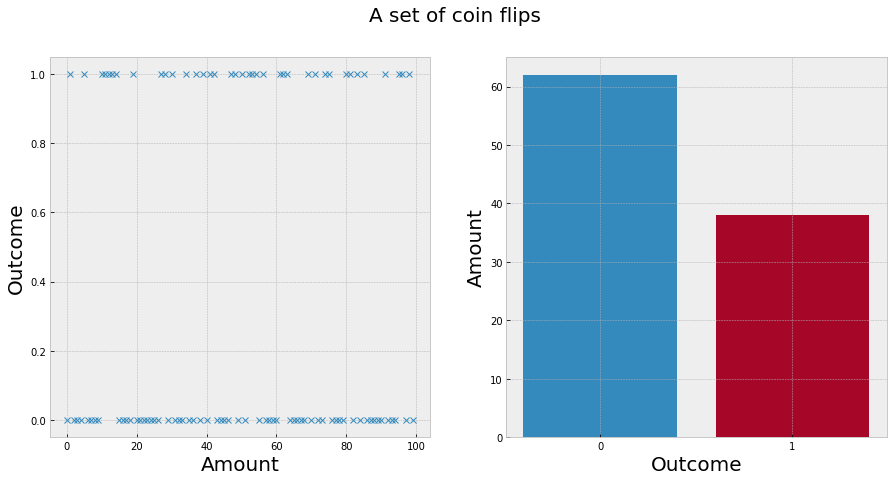

In [20]:
# Quick plot

ind=[0, 1]

fig = plt.figure(figsize=(15,7))

plt.subplot(1, 2, 1)
plt.plot(flips, 'x')
plt.xlabel("Amount", fontsize=20)
plt.ylabel("Outcome", fontsize=20)

plt.subplot(1, 2, 2)
plt.bar(ind[0], height=N_trials-flips.sum())
plt.bar(ind[1], height=flips.sum())
plt.xlabel("Outcome", fontsize=20)
plt.ylabel("Amount", fontsize=20)

plt.subplots_adjust(wspace=0.2)
plt.suptitle("A set of coin flips", fontsize=20)
plt.xticks(ind, ('0', '1'))

## Setting-up a PyMC3 model

In [21]:
# Initialize a PyMC3 model

with pm.Model() as model:
    
    # Define stochastic variable theta by providing a Beta(1,1) as a prior
    
    prior = pm.Beta("theta", alpha=1, beta=1)  
    
    # Define your observations
    
    obs = pm.Bernoulli("obs", p=prior, observed=flips)

In [22]:
with model:
    
    # Define MCMC method
    
    step = pm.Metropolis()
    
    # Setup sampler for first 500 steps Your burn-in period.
    
    trace_burnin = pm.sample(500, step=step)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta_logodds__]
100%|██████████| 1000/1000 [00:00<00:00, 1832.42it/s]
INFO (theano.gof.compilelock): Waiting for existing lock by process '13261' (I am process '13262')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/mariusk/.theano/compiledir_Linux-4.15--generic-x86_64-with-Ubuntu-16.04-xenial-x86_64-3.5.2-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '13261' (I am process '13263')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/mariusk/.theano/compiledir_Linux-4.15--generic-x86_64-with-Ubuntu-16.04-xenial-x86_64-3.5.2-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '13262' (I am process '13263')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/mariusk/.theano/compiledir_Linux-4.15--generic-x86_64-with-Ubuntu-16.04-xenial-x86_64-3.5.2-64/lock_dir
The number of effective samples is smaller

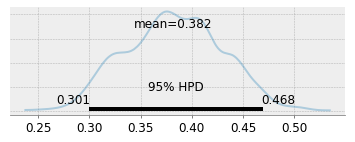

In [36]:
# Plot the posterior distribution

pm.plot_posterior(trace_burnin['theta'], kde_plot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95134f43c8>,
      dtype=object)

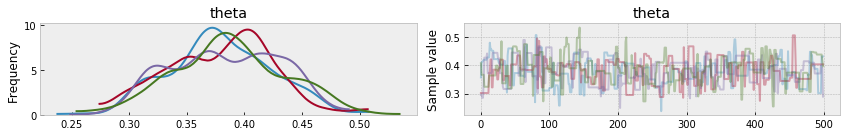

In [24]:
pm.traceplot(trace_burnin, varnames=['theta'])

In [25]:
with model:

    # Extend the sampling after the burn-in period
    
    trace_production = pm.sample(25000, trace=trace_burnin, step=step)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta_logodds__]
100%|██████████| 25500/25500 [00:02<00:00, 9349.06it/s]
The number of effective samples is smaller than 25% for some parameters.


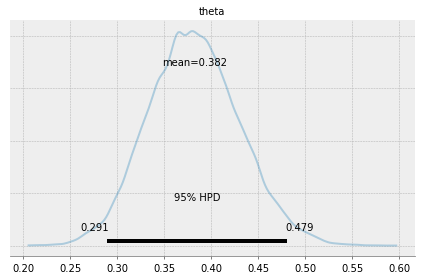

In [26]:
# Plot the posterior for the production run

pm.plot_posterior(trace_production, kde_plot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f951304f550>,
      dtype=object)

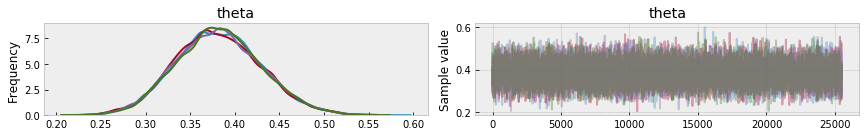

In [27]:
# Plot the trace for the production run

pm.traceplot(trace_production)

In [28]:
# Plot summary statistics

pm.summary(trace_production)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
theta,0.381889,0.048079,0.000341,0.291209,0.478559,17209.0,1.000072


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9513000240>,
      dtype=object)

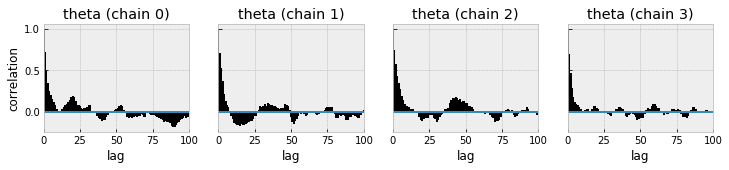

In [29]:
# Plot autocorrelation

pm.autocorrplot(trace_burnin)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f950ee62dd8>,
      dtype=object)

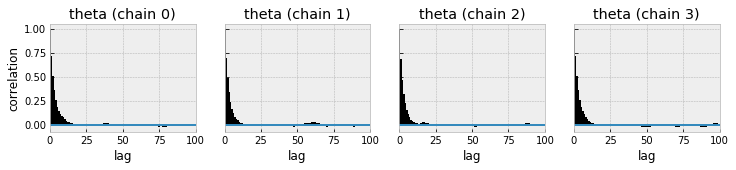

In [30]:
# Plot autocorrelation

pm.autocorrplot(trace_production)

## One can provide a better starting value for the sampler

In [31]:
help(pm.find_MAP)

Help on function find_MAP in module pymc3.tuning.starting:

find_MAP(start=None, vars=None, method='L-BFGS-B', return_raw=False, include_transformed=True, progressbar=True, maxeval=5000, model=None, *args, **kwargs)
    Finds the local maximum a posteriori point given a model.
    
    Parameters
    ----------
    start : `dict` of parameter values (Defaults to `model.test_point`)
    vars : list
        List of variables to optimize and set to optimum (Defaults to all continuous).
    method : string or callable
        Optimization algorithm (Defaults to 'L-BFGS-B' unless
        discrete variables are specified in `vars`, then
        `Powell` which will perform better).  For instructions on use of a callable,
        refer to SciPy's documentation of `optimize.minimize`.
    return_raw : bool
        Whether to return the full output of scipy.optimize.minimize (Defaults to `False`)
    include_transformed : bool
        Flag for reporting automatically transformed variables in add

In [32]:
with pm.Model() as model_MAP:
    
    # Define stochastic variable theta by providing a Beta(1,1) as a prior
    
    prior = pm.Beta("theta", alpha=1, beta=1)  
    
    # Define your observations
    
    obs = pm.Bernoulli("obs", p=prior, observed=flips)
    
    # Define your MCMC method
    
    step = pm.Metropolis()
    
    # Find a local local maximum a posteriori (MAP) point
    
    trace_MAP = pm.sample(5000, start=pm.find_MAP(), step=step)

logp = -69.315, ||grad|| = 12: 100%|██████████| 5/5 [00:00<00:00, 2255.00it/s]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta_logodds__]
100%|██████████| 5500/5500 [00:00<00:00, 8781.35it/s]
The number of effective samples is smaller than 25% for some parameters.


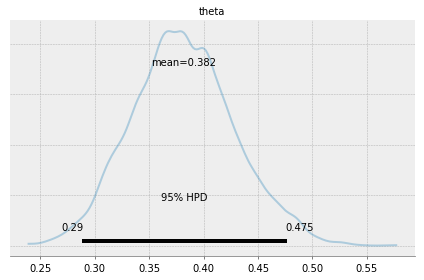

In [33]:
# Plots posterior plot of MAP trace

pm.plot_posterior(trace_MAP, kde_plot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9513c1e978>,
      dtype=object)

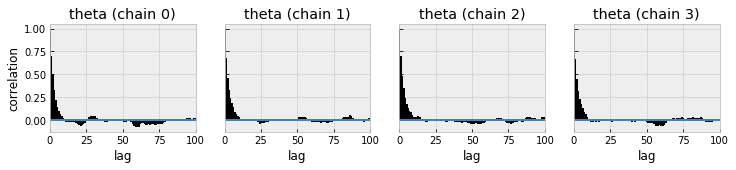

In [34]:
# Plot autocorrelation of MAP trace

pm.autocorrplot(trace_MAP)